# House Keeping

Pippin:

In [ ]:
!pip install rasterio
!pip install kaggle

     |████████████████████████████████| 18.1MB 1.8MB/s 


In [ ]:
!kaggle competitions download -c ds4g-environmental-insights-explorer
!mkdir gfs gldas s5p gppd
!mv gfs* gfs/
!mv gldas* gldas/
!mv s5p_no2* s5p_no2/
!unzip -q /content/\*.zip -d /content/s5p
!rm /content/*.zip
!mv gppd* gppd/

  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 4.19MB/s]
  0% 0.00/3.19M [00:00<?, ?B/s]
100% 3.19M/3.19M [00:00<00:00, 106MB/s]
  0% 0.00/3.49M [00:00<?, ?B/s]
100% 3.49M/3.49M [00:00<00:00, 115MB/s]
100% 4.13M/4.13M [00:00<00:00, 11.8MB/s]

  0% 0.00/3.09M [00:00<?, ?B/s]
100% 3.09M/3.09M [00:00<00:00, 102MB/s]
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 57.8MB/s]
  0% 0.00/3.89M [00:00<?, ?B/s]
100% 3.89M/3.89M [00:00<00:00, 129MB/s]
  0% 0.00/3.64M [00:00<?, ?B/s]
100% 3.64M/3.64M [00:00<00:00, 120MB/s]
100% 4.11M/4.11M [00:00<00:00, 15.9MB/s]

  0% 0.00/3.41M [00:00<?, ?B/s]
100% 3.41M/3.41M [00:00<00:00, 109MB/s]
  0% 0.00/3.23M [00:00<?, ?B/s]
100% 3.23M/3.23M [00:00<00:00, 106MB/s]
100% 4.02M/4.02M [00:00<00:00, 18.6MB/s]

  0% 0.00/3.01M [00:00<?, ?B/s]
100% 3.01M/3.01M [00:00<00:00, 99.3MB/s]
  0% 0.00/3.82M [00:00<?, ?B/s]
100% 3.82M/3.82M [00:00<00:00, 127MB/s]
  0% 0.00/3.20M [00:00<?, ?B/s]
100% 3.20M/3.20M [00:00<00:00, 106MB/s]
  0% 0.

Imports:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rio
import folium
import glob
import ee
from google.oauth2.credentials import Credentials

Google Earth Engine Set Up

In [ ]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=hs9ET9o0nEH00LZhVBQHVeNMULwwAmr8J5b5apFRkdA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/ywEaHKaQy4ewY2wuJIL6P9TDnscjKO1bLiovui0VuZRiNun22v6f21E

Successfully saved authorization token.


In [ ]:
!cat ~/.config/earthengine/credentials
creds = !cat ~/.config/earthengine/credentials
creds = creds[0]
creds = creds.split(sep="\"")
creds = creds[3]

In [ ]:
credentials = Credentials(
        None,
        refresh_token=creds,
        token_uri=ee.oauth.TOKEN_URI,
        client_id=ee.oauth.CLIENT_ID,
        client_secret=ee.oauth.CLIENT_SECRET,
        scopes=ee.oauth.SCOPES)
ee.Initialize(credentials=credentials)

# Emission Factor Exploration 

The goal is to explore and hopefully form a methodology to calculate the enivromental impact of an anthropogenic (human caused) activity on the surface of the Earth. This will be focused on atmospheric pollution but the methodology can be further applied to more forms of anthropogenic pollution, such as water and soil. 
Among the literature this enviromental impact is referred to as an *emission factor* of an activity.

As inspired by the [Kaggle competition](https://www.kaggle.com/c/ds4g-environmental-insights-explorer/data)

We will be focusig on the emission factor due to electricity generation. Beginning with an exploration of the competition's available data. This data focusses on Puerto Rico, with its size, location and data it provides suitable refernce for initial data exploration.

The overall goal is to calculate the following:

$EF = \frac{E}{A\cdot(1-\frac{ER}{100})}\tag1$

where: EF - emission factor, E - emmisions, A - activity rate

Throughout this project we will be focusing on $NO_2$ emissions using the [Sentinel-5P OFFL NO2](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2) dataset for the atmospheric $NO_2$ levels.

#Data Exploration

Helper Functions

In [ ]:
# adapted from:
# https://www.kaggle.com/paultimothymooney/how-to-get-started-with-the-earth-engine-data/comments

def create_map(latitude,longitude,zoom):
  location = [latitude,longitude]
  m = folium.Map(location=location,zoom_start=zoom)
  return m

# plot the generating station over the map of puerto rico
def 
_on_map(dataframe,begin_index,end_index,latitude_column,latitude,longitude_column,longitude,zoom):
    df = dataframe[begin_index:end_index]
    m = create_map(latitude,longitude,zoom)
    for i in range(0,len(df)):
        popup = folium.Popup(str(df.primary_fuel[i:i+1]))
        lat = df[latitude_column].iloc[i]
        lon = df[longitude_column].iloc[i]
        folium.Circle(
          radius=100,
          location=[lat, lon],
          popup=popup,
          color='crimson',
          fill=False,
        ).add_to(m)
        
    return(m)

# overlay remote sensing data on the map of puerto rico
def overlay_image_on_puerto_rico(file_name,band_layer):
    band = rio.open(file_name).read(band_layer)
    m = create_map(latitude,longitude,zoom)
    folium.raster_layers.ImageOverlay(
        image=band,
        bounds = [[18.6,-67.3,],[17.9,-65.2]],
        colormap=lambda x: (1, x, 0, x),
    ).add_to(m)
    return m

# combination of the two functions above, overlay with generating stations
def points_overlay_on_map(dataframe,begin_index,end_index,latitude_column,latitude_value,longitude_column,longitude_value,zoom,file_name,band_layer):
    df = dataframe[begin_index:end_index] # re-index, for subsetting the plot
    location = [latitude_value,longitude_value]
    m = folium.Map(location=location,zoom_start=zoom) # build the folium map 
    for i in range(0,len(df)): # plot the generating facilities
        popup = folium.Popup(str(df.primary_fuel[i:i+1]))
        # folium.Marker([df[latitude_column].iloc[i],df[longitude_column].iloc[i]],popup=popup).add_to(m)
        lat = df[latitude_column].iloc[i]
        lon = df[longitude_column].iloc[i]
        folium.Circle(
          radius=100,
          location=[lat, lon],
          popup=popup,
          color='crimson',
          fill=False,
        ).add_to(m)

    # plot the overlay of the selected band
    band = rio.open(file_name).read(band_layer)
    folium.raster_layers.ImageOverlay(  
        image=band,
        bounds = [[18.6,-67.3,],[17.9,-65.2]],
        colormap=lambda x: (1, x, 0, x),
    ).add_to(m)
    return m 

def add_ee_layer(self, ee_image_object, vis_params, name):
  # adapted from https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

def plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom):
    # adapted from https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
    # Add EE drawing method to folium.
    folium.Map.add_ee_layer = add_ee_layer
    vis_params = {
      'min': minimum_value,
      'max': maximum_value,
      'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
    my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
    data = ee.ImageCollection(dataset).filterDate(
        begin_date, end_date)
    my_map.add_ee_layer(data.first().select(column), vis_params, 'Color')
    my_map.add_child(folium.LayerControl())
    display(my_map)

def plot_ee_data_on_map_simple(dataset,minimum_value,maximum_value,latitude,longitude,zoom):
    # adapted from https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
    folium.Map.add_ee_layer = add_ee_layer
    vis_params = {
      'min': minimum_value,
      'max': maximum_value,
      'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}
    my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
    my_map.add_ee_layer(dataset, vis_params, 'Color')
    my_map.add_child(folium.LayerControl())
    display(my_map)

# Print the metadata given a tiff file
def meta_data(file_name):
  with rio.open(file_name) as img_filename:
      print('Metadata for: ',file_name)
      print('Bounding Box:',img_filename.bounds)
      print('Resolution:',img_filename.res)
      print('Tags:',img_filename.tags())
      print('More Tags:',img_filename.tags(ns='IMAGE_STRUCTURE'))
      print('Number of Channels =',img_filename.count,'\n')

# Helper functions:
def plot_scaled(file_name):
    vmin, vmax = np.nanpercentile(file_name, (5,95))  # 5-95% stretch
    img_plt = plt.imshow(file_name, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
def split_column_into_new_columns(dataframe,column_to_split,new_column_one,begin_column_one,end_column_one):
    for i in range(0, len(dataframe)):
        dataframe.loc[i, new_column_one] = dataframe.loc[i, column_to_split][begin_column_one:end_column_one]
    return dataframe

##Data Discussion:
The initial data present on the Kaggle competion provided a resonable start but with the complexity of the problem at hand, a larger larger frame of reference is needed. This being said we will keep focus on more data allows for further expansion to other parts of the world.

## **gppd**: global power plant database

The gppd presents information regarding hundreds of power plants around the world.

In [ ]:
power_plants = pd.read_csv('gppd/gppd_120_pr.csv')
power_plants = split_column_into_new_columns(power_plants,'.geo','latitude',50,66)
power_plants = split_column_into_new_columns(power_plants,'.geo','longitude',31,48)
power_plants['latitude'] = power_plants['latitude'].astype(float)
power_plants['longitude'] = power_plants['longitude'].astype(float)
a = np.array(power_plants['latitude'].values.tolist()) # 18 instead of 8
power_plants['latitude'] = np.where(a < 10, a+10, a).tolist() 
lat=18.200178; lon=-66.664513
plot_points_on_map(power_plants,0,425,'latitude',lat,'longitude',lon,9)

##**gfs**: Global Forcast System
This set includes remote sensing data of a regions weather data. 6 available bands.

Source: https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25 

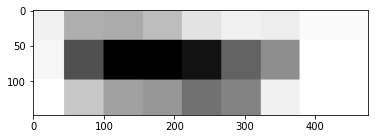

In [ ]:
band_num = 1
image = '/content/gfs/gfs_2018070100.tif'

image_band = rio.open(image).read(band_num)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=band_num)
# points_overlay_on_map(power_plants,0,425,'latitude',lat,'longitude',lon,9,image,band_layer=band_num)

In [ ]:
dataset = "NOAA/GFS0P25"
column = 'u_component_of_wind_10m_above_ground'
# column = 'temperature_2m_above_ground'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = -10
maximum_value = 40
latitude = 18.200178
longitude = -66.664513
zoom = 7.6
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)

##**gldas**: Global Land Data Assimilation System
Uses both ground and satellite observations. Only populates land observations.

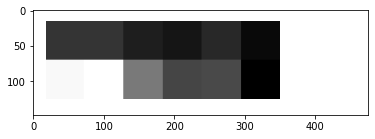

In [ ]:
band_num = 1
images = glob.glob('/content/gldas/*.tif')

image = '/content/gldas/gldas_20180701_0000.tif'

image_band = rio.open(image).read(band_num)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=band_num)
# points_overlay_on_map(power_plants,0,425,'latitude',lat,'longitude',lon,9,image,band_layer=band_num)

In [ ]:
dataset = "NASA/GLDAS/V021/NOAH/G025/T3H"
column = 'Lwnet_tavg'
column = 'Wind_f_inst'
begin_date = '2018-07-08'
end_date = '2018-07-14'
minimum_value = -1000
maximum_value = 200
latitude = 18.200178
longitude = -66.664513
zoom = 7.6
plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom)

##**s5p_NO2**: Sentinel-5P OFFL NO2: Offline Nitrogen Dioxide ($NO_2$)

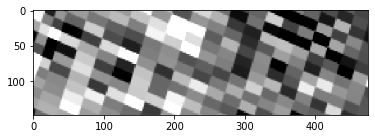

In [ ]:
band_num = 1
image = '/content/s5p/s5p_no2_20180701T161259_20180707T175356.tif'

image_band = rio.open(image).read(band_num)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=band_num)
# points_overlay_on_map(power_plants,0,425,'latitude',lat,'longitude',lon,9,image,band_layer=band_num)

In [ ]:


def s5p_NO2_overlay(latitude, longitude, initial_date, final_date, band_name):
    location = [latitude, longitude]
    Map = folium.Map(location=location, zoom_start=7)
    band = {'min': 0,
            'max': 0.0001,
            'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'],
            'opacity':0.5}
    s5p_no2 = (ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2')
              .select(band_name)
              .filterDate(startdate, finishdate)
             )
    Map.add_ee_layer(ee_s5p_no2.mean(), band, 'S5P_NO2')
    Map.add_child(folium.LayerControl())
    return Map
startdate = '2019-10-01'
finishdate = '2019-10-14'
latitude = 18.20
longitude = -66.66
band = 'tropospheric_NO2_column_number_density'

#Sentinel-5P OFFL NO2: Offline Nitrogen Dioxide
s5p_NO2_overlay(latitude,longitude,startdate,finishdate,band)

In [ ]:


meta_data('/content/gldas/gldas_20180701_0600.tif')
meta_data('/content/gfs/gfs_2018070100.tif')
meta_data('/content/s5p/s5p_no2_20180701T161259_20180707T175356.tif')


Metadata for:  /content/gldas/gldas_20180701_0600.tif
Bounding Box: BoundingBox(left=-67.32431391288841, bottom=17.901215296567198, right=-65.19081511310455, top=18.565968606815645)
Resolution: (0.004491576420597608, 0.004491576420597608)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}
Number of Channels = 12 

Metadata for:  /content/gfs/gfs_2018070100.tif
Bounding Box: BoundingBox(left=-67.32354977311168, bottom=17.900451156790464, right=-65.19005097332781, top=18.56520446703891)
Resolution: (0.004491576420597608, 0.004491576420597608)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}
Number of Channels = 6 

Metadata for:  /content/s5p/s5p_no2_20180701T161259_20180707T175356.tif
Bounding Box: BoundingBox(left=-67.32431391288841, bottom=18.564903861343627, right=-65.19081511310455, top=17.90015055109518)
Resolution: (0.004491576420597608, -0.004491576420597608)
Tags: {'AREA_OR_POINT': 'Area'}
More Tags: {

##**gpwv411**: Population Density (Gridded Population of the World Version 4.11)

Provides population density organized into a gridded map via google earth engine. The data was generated from internation censuses ranging from 2000 - 2020. We will be using the most recent version of the data.
Source: [CIESIN](https://sedac.ciesin.columbia.edu/data/collection/gpw-v4)

In [ ]:
dataset = "CIESIN/GPWv411/GPW_Population_Density"
column = 'population_density'
minimum_value = 200
maximum_value = 1000
latitude = 18.200178
longitude = -66.664513
zoom = 7.6
folium.Map.add_ee_layer = add_ee_layer
vis_params = {
  'min': minimum_value,
  'max': maximum_value,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'],
  'opacity':0.5}
my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
data = ee.ImageCollection(dataset)
my_map.add_ee_layer(data.first().select(column), vis_params, 'Color')
my_map.add_child(folium.LayerControl())
display(my_map)


#Model


After exploring the data and further research into the overall behaviour of $NO_2$, to measure the emissions from a region of interest we take a weighted $NO_2$ reading adjusting for possible interference. When specifying the granularity of the estimation, the ideal situation would be to determine the emission factor for each generating station. This being said we shall create multiple models to evaluate the emission factor over varying time-span and area of origin. Being doubtful of a one-fits-all model, we explore a scaling model by the size of the region. To determine the total emissions we will iteratively perform transformations to remove interference. Then apply a weighting to the region of interest to ensure the the values closest to the station are more significant then the values further away.


![NO2 Cycle](https://drive.google.com/uc?id=1IjNTntUm3oiQlsMp7tZDKkAtwIiL3sqm)

In deciding which features to select for the model we will focus on simplicity in implementation and interpretation to demonstrate the possibility of the proposed model. 
We can split up features to support different portions of the calculation:

$EF = \frac{E}{A\cdot(1-\frac{ER}{100})}\tag1$

> **E** - representing the emissions, since we are discussing $NO_2$ emissions the simplest measurement of a regions emissions would be the satellite reading from above. But this would not be accurate due to interference. Therefore we will select a few features to clean up the interference of the measurement. The following are simple forms of interference:

1.   Other sources of $NO_2$. This includes transportation, and residential emissions as well as other high producers ex. other power generating stations, states, countries, continants in close proximity to the region of origin. The smaller the region of origin the smaller the region of interference. To transform the orginal $NO_2$ measurements the other sources will be pixel-wise deducted. 

2.   Weather attributes. The main interference to reading is the wind, the blowing of the $NO_2$ measurement can skew the emissions substantially. To transform via the wind, the $NO_2$ data will be translated the mean displacement during the time frame.

> **A** & **ER** - the activity, extrapolated from power plant datasets, these values will be very plant specific. 

**Scaling**

With data coming from several different satellites, we must be careful with our calculations. Firstly, each satellite has its own resolution in degrees. This represents the arc of each pixel, we use this to determine the single-pixel area.

**Mosaicing**

Generating the tiling of thhe satellite imagery into daily images given a timeframe.

In [ ]:
# adapted from https://www.kaggle.com/niyamatalmass/2-sub-region-and-state-wise-e-f-and-evaluation

def tiles_to_mosaics(collection, date, newlist):
  """
  converts the tiles into day into a full mosaic image
  """
  date = ee.Date(date)
  newlist = ee.List(newlist)
  filtered = collection.filterDate(date, date.advance(1,'day'))
  image = ee.Image(filtered.mosaic())

  return ee.List(ee.Algorithms.If(filtered.size(), newlist.add(image), newlist))



def mosiac_transform(collection, initial_date, final_date):
  """
  param: - collection, an EE ImageCollection
         - initial_date (STR), starting date of the time frame
         - final_date    (STR), ...
  """
  initial_date = ee.Date(initial_date)
  final_date = ee.Date(final_date)

  timeframe = final_date.difference(initial_date, 'day') # determine the timeframe
  range_date = ee.List.sequence(0, timeframe.subtract(1)).map(lambda day: initial_date.advance(day, 'day'))

  def tiles_to_mosaics(date, newlist):
    """
    converts the tiles into day into a full mosaic image
    """
    date = ee.Date(date)
    newlist = ee.List(newlist)
    filtered = collection.filterDate(date, date.advance(1,'day'))
    image = ee.Image(filtered.mosaic())

    return ee.List(ee.Algorithms.If(filtered.size(), newlist.add(image), newlist))

  return ee.ImageCollection(ee.List(range_date.iterate(tiles_to_mosaics,ee.List([]))))


##Feature Selection

**Wind**

For wind it is important to note speed and direction it may also be interesting to incorporate precipitation.
The wind attributes we used are:
* `u_component_of_wind_10m_above_ground` representing the east-west wind speed
*`u_component_of_wind_10m_above_ground` similarly representing the north-south wind speed

Together these two attributes can create the 2D direction of wind blowing during a given time frame. Furthermore we multiply out seconds per day to determine the total displacement.

In [ ]:
def get_wind(ROI,initial_date,final_date):
  """
  input:  RoI - Region of Interest
          initial_date, final_date - timeframe to observe
  output: u_comp_collection, v_comp_collection - ee.ImageCollections, scaled mosiac collections of the u and v components of wind over the timeframe
  """

  u_comp_collection = ee.ImageCollection("NOAA/GFS0P25").select('u_component_of_wind_10m_above_ground').filterDate(initial_date,final_date).filterBounds(ROI)
  v_comp_collection = ee.ImageCollection("NOAA/GFS0P25").select('v_component_of_wind_10m_above_ground').filterDate(initial_date,final_date).filterBounds(ROI)
  u_comp_collection = mosiac_transform(u_comp_collection,initial_date,final_date)
  v_comp_collection = mosiac_transform(v_comp_collection,initial_date,final_date)
  #86,400 seconds per day
  u_comp_collection = u_comp_collection.map(lambda image: image.multiply(86400)) # m/s -> m
  v_comp_collection = v_comp_collection.map(lambda image: image.multiply(86400)) # m/s -> m

  return u_comp_collection, v_comp_collection


**Population**

With population density, we can extrapolate deduct the emissions caused by residential and city sources. The GPWv411 has a resolution of 30 arc seconds.

$30\text{ arc seconds} =$[0.008333](https://sedac.ciesin.columbia.edu/data/collection/gpw-v4)$^\circ$ 

To find the area we assume each observation is square and flat; squaring one edge to get the total $m^2$.

$\frac{\theta}{360^\circ}\cdot2\pi r = \frac{0.00833}{360^\circ}\cdot2\pi\cdot 6371 = 0.92625 km \rightarrow 0.85793 m^2$

To further estimate the $NO_2$ emission, we look at the $NO_x$ (Nitrogen Oxides, which includes $NO_2$ and $NO$) group emissions per capita. We do not need to further distinguish between the chemicals among the $NO_x$ group as the majority is $NO_2$ and there are many contributing factors to determining the other quantities (temperature, time of day, season, etc.). We also will assume these values are constant all year. This introduces inaccuracy since winter emissions are much higher in most parts of the world.

[NOx kg per capita per country](https://data.oecd.org/air/air-and-ghg-emissions.htm)

![Particularly bad day in LA in the 1960s](https://drive.google.com/uc?id=1b2UdlnEw7fxE3QxnzdwOcoghbQCYfuvt)

Environmental Chemistry, 5e, Colin Baird, Michael Cann, 2012  published by the W. H. Freeman and Company in New York




In [ ]:
def get_pop(ROI,initial_date,final_date,NOx_per_cap):
  """
  input:  RoI - Region of Interest
          initial_date, final_date - timeframe to observe
          NOx_per_cap - NOx emissions per capita, this differs per country
  output: pop_collection - ee.ImageCollection, scaled mosiac collection of the NO2 emissions by people over the timeframe.
  """
  pop_collection = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Density").select('population_density').filterBounds(ROI)

  # calc, time frame
  scalent = (0.85793*NOx_per_cap)/1000*365 # To scale: (capita/km^2)*(NOx kg/capita)*(%year)*(kg^-1)*(year^-1) -> NOx g/day
  pop_collection = pop_collection.map(lambda image: image.multiply(scalent)) # NOx g/day

  return pop_collection # NOx g/day

$NO_2$

When selecting the feature for $NO_2$ readings we will look at `tropospheric_NO2_column_number_density` over the stratospheric to display the most direct influences of the generating stations. Additionally, this is the area of the atmosphere effected by weather.
![alt text](https://drive.google.com/uc?id=17clGlHdcznPf8ZeKaztvlywBKqkWqn-J)

Similar to the wind calculation we can determine the metre square per pixel. The S5P dataset has a resolution 0.01 arc degrees.

$\frac{\theta}{360^\circ}\cdot2\pi r = \frac{0.01}{360^\circ}\cdot2\pi\cdot 6371 = 1.1194 km = 1194.92 m \rightarrow 1,236,431 m^2$ 

In [ ]:
def get_NO2(ROI,initial_date,final_date):
  """
  input:  RoI - Region of Interest
          initial_date, final_date - timeframe to observe
  output: no2_collection - ee.ImageCollection, scaled mosiac collection of the total NO2 over the timeframe
  """
  # Data Acquiry
  no2_collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate(initial_date,final_date).filterBounds(ROI)
  # Mosaicing
  no2_collection = mosiac_transform(no2_collection,initial_date,final_date) # NO2 image/day

  # Unit Conversion
  scalent = (1236431.1)*(46.0055) # To scale: (mol NO2/m^2)*(m^2)*(g/mol)
  no2_collection = no2_collection.map(lambda image: image.multiply(scalent)) # mol/m^2 -> mol

  return no2_collection # NO2 g/day

**Other Possible Features**

There are many other features that could be included in the future to further enhance the models robustness. Including:
* Roadways, pollution from transportation is somewhat included from the population density data but further support can be gained through roadway geometries
* Flux, specifically long-wave downward flux (available via gldas) can provide additional support to the $NO_2$ measure.
* Specific ICE information. If the types of internal combustion engines used in the burning of various fuels was available, this would provide further information regarding the emissions reduction metric, as well as a theoretical estimation that can then be adjusted by the remote sensing data.

##Build

In [ ]:
# power point data setup
country = 'CAN'
# determine the NOx per capita of the country of interest
df = pd.read_csv("") # INSERT DF DIRECTORY HERE!
a = df.loc[df['LOCATION'] == country]
NOx_per_cap = (a.iloc[0,6]).tolist()
scalent = (0.85793*NOx_per_cap)/1000*365
# obtain power plant data filtered to the country of interest
pp_collection = ee.FeatureCollection("WRI/GPPD/power_plants")
country_filter = ee.Filter.eq('country', country)
pp_collection = pp_collection.filter(country_filter)

In [ ]:
def emissions(feature, initial_date, final_date, country = "CAN"):
  """
  input:  RoI - ee.Geometry ,Region of Interest
          initial_date, final_date - string, timeframe to observe
          country - string ,3 letter country code
  output: total emissions - float, total emisions for the region of origini and region of interest
  """


  buffer_amount = ee.Number(feature.get('gwh_2016')).multiply(1.1)
  ROI = feature.geometry().buffer(distance = buffer_amount, maxError = 200)
  # print(ROI.area(100))

  # Get data:
  u_comp, v_comp = get_wind(ROI,initial_date,final_date)
  pop_em = get_pop(ROI,initial_date,final_date,NOx_per_cap)
  working_collection = get_NO2(ROI,initial_date,final_date)

  # Perform Tranformations (RoI):
  # Wind:
  meanReducer = ee.Reducer.mean()
  # MAJOR ASSUMPTION for simplicity: wind is averaged over time.
  u_comp = u_comp.mean() 
  v_comp = v_comp.mean()

  u_trans = u_comp.reduceRegion(reducer = meanReducer, 
                                geometry = ROI,
                                scale = 27829)
  v_trans = v_comp.reduceRegion(reducer = meanReducer, 
                                geometry = ROI,
                                scale = 27829)
  working_collection = working_collection.map(lambda image: image.translate(x = u_trans,
                                                                            y = v_trans,
                                                                            units = "meters"
                                                                            ))
  # Population Emissions:
  pop_em = pop_em.mean()
  working_collection = working_collection.map(lambda image: image.subtract(pop_em))

  # Weighting by distance:
  # adapted from https://www.kaggle.com/niyamatalmass/3-individual-power-plant-e-f-and-evaluation
  working_collection = working_collection.reduce(ee.Reducer.sum())

  maxD = 20000 # 20km max distance
  distance = pp_collection.distance(searchRadius = maxD,
                                    maxError = 1000)
  weight = distance.subtract(maxD).abs().divide(maxD)
  working_collection = working_collection.addBands(weight)

  kernel = ee.Kernel.gaussian(
      radius = 3, sigma = 1, units = 'pixels'
  )
  working_collection = working_collection.convolve(kernel)

  # Calculate Emissions (weighted RoI):
  weighter = ee.Reducer.sum() #.splitWeights()
  total_emissions = working_collection.reduceRegion(reducer = weighter,
                                                    geometry = ROI,
                                                    scale = 1113)
  # print(str(total_emissions.get('sum')))
  return feature.set({'NO_2 Emissions':total_emissions.get('sum')})

##Results

In [ ]:

initial_date = '2018-06-01'
final_date = '2019-06-01'

em_collection = pp_collection.map(lambda feature: emissions(feature,initial_date,final_date,'CAN'))

In [ ]:
first_batch_pp_code

In [ ]:
# adapted from https://www.kaggle.com/niyamatalmass/3-individual-power-plant-e-f-and-evaluation
em_collection = em_collection.reduceColumns(
    reducer=ee.Reducer.toList().repeat(5),
    selectors=['gppd_idnr', 'name', 'latitude', 'longitude', 'total_no2']).getInfo()
results = pd.DataFrame(columns=['gppd_idnr', 'name', 'latitude', 'longitude', 'total_no2'])
def convert_feature_collection_results_to_df(results, dataframe):
    dataframe['gppd_idnr'] = pd.Series(results.get('list')[0])
    dataframe['name'] = pd.Series(results.get('list')[1])
    dataframe['latitude'] = pd.Series(results.get('list')[2])
    dataframe['longitude'] = pd.Series(results.get('list')[3])
    dataframe['total_no2'] = pd.Series(results.get('list')[4])
    return dataframe
results = convert_feature_collection_results_to_df(em_collection, results)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
results.head()

,gppd_idnr,name,latitude,longitude,total_no2
0,CAN0002051,Greenfield Energy Centre,42.7701,-82.4528,NaN
1,CAN0002087,St. Clair,42.8973,-82.3984,NaN
2,CAN0002090,TransAlta Sarnia Cogeneration,42.9346,-82.4381,NaN
3,CAN0002095,York Energy Centre,44.0757,-79.5309,NaN
4,CAN0002069,Mississauga,43.6987,-79.6434,NaN


Most likely due to a zeroing of the `working_collection` or a unit/scaling problem along the way. The best course of action is to translate all of my python into java and run it straight through the earth engine editor. Debugging through the editor is much easier as well as plotting. Additionally **all** the reference documentation is in java, making it very difficult to troubleshoot.

#Furture Work


When applying the such simply transformations it results in several large assumptions. Expanding the model to more rebust and data driven learning will increase the applicablilty and overall quality of the model. Additionally to tackle the dimensionality problem among remote sensing data we can develop a framing system that fixes the amount of sample it takes but remains scalable to ensure its robustness.

Appendix A:

Code from Earth Engine Editor for testing, further exploration but primarily learning how ee works :)




```
// GFS info
var start = '2019-06-01';
var end = '2019-06-20';
var gfs = ee.ImageCollection('NOAA/GFS0P25')
                  .filterDate(start, end).filterBounds(geometry3);
var scale = gfs.first(gfs).projection().nominalScale();
print("GFS pixel area", scale);   
var visParams = {
  min: -40.0,
  max: 35.0,
  palette: ['blue', 'purple', 'cyan', 'green', 'yellow', 'red'],
};
gfs = gfs.select('u_component_of_wind_10m_above_ground')
Map.addLayer(gfs.mean(), visParams, 'gfs');

// GPW info
var gpw = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Density").first();
var scale = gpw.first(gpw).projection().nominalScale();
print("GPW pixel area", scale);
var gpw = gpw.select('population_density');
var visParams = {
  "max": 1000.0,
  "palette": [
    "ffffe7",
    "FFc869",
    "ffac1d",
    "e17735",
    "f2552c",
    "9f0c21"
  ],
  "min": 200.0
};
Map.addLayer(gpw, visParams, 'population_density');

// S5P info
var s5p = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2')
  .select('tropospheric_NO2_column_number_density')
  .filterDate('2019-06-01', '2019-06-06');
var scale = s5p.first().projection().nominalScale();
print("NO2 pixel area", scale);
var visParams = {
  min: 0,
  max: 0.0002,
  palette: ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};
Map.addLayer(s5p.mean(), visParams, 'S5P N02');

print("Rect. Area",geometry3.area(2))
print("Width",geometry.length(1))
print("Height",geometry5.length(6))
print("Diag",geometry6.length(1))



var bandNames = s5p.first().date();
print('s5p Band names: ', bandNames);

var bandNames = gfs.first().bandNames();
print('gfs Band names: ', bandNames);

var scalent = (0.85793*47)/(1000*360);
// gpw = gpw.map(function(image) {
//   return image.multiply(scalent);
// });
gpw = gpw.multiply(scalent)
var scalent = (1236431.1)*(46.0055);
s5p = s5p.map(function(image) {
  return image.multiply(scalent);
});
var visParams = {
  min: 551.38,
  max: 50695.40,
  palette: ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};


Map.addLayer(gpw,visParams,'scaledGpw')

var sub = s5p.mean().subtract(gpw)
Map.addLayer(sub, visParams, 'Sub')

var maxReducer = ee.Reducer.min();
var Max = sub.reduceRegion(maxReducer, china);
print("max",Max);
// max of china 28695.40

Map.setCenter(65.27, 24.11, 2);
```



**References:**

[1] 	United States Environmental Protection Agency, "Basic Information of Air Emissions Factors and Quantification," United States Environmental Protection Agency, 2 September 2016. [Online]. Available: https://www.epa.gov/air-emissions-factors-and-quantification/basic-information-air-emissions-factors-and-quantification#Emissions%20Factors%20Procedures. [Accessed 15 Februray 2020].

[2] 	Environmental Insights Explorer Team, Google, "DS4G: Environmental Insights Explorer | Kaggle," Kaggle Inc, 11 February 2020. [Online]. Available: https://www.kaggle.com/c/ds4g-environmental-insights-explorer/overview. [Accessed 13 February 2020].

[3] 	European Union/ESA/Copernicus, Sentinel-5P OFFL NO2: Offline Nitrogen Dioxide, Google Earth Engine;, 2018. 

[4] 	NOAA/NCEP/EMC, GFS: Global Forecast System 384-Hour Predicted Atmosphere Data, Google Earth Engine, 2015. 

[5] 	NASA, GLDAS-2.1: Global Land Data Assimilation System, Google Earth Engine, 2000. 

[6] 	Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute., Global Power Plant Database, Google Earth Engine, 2018.. 

[7] 	EPA, "AP - 42 Vol. I Introduction - c00s00.pdf," [Online]. Available: https://www3.epa.gov/ttnchie1/ap42/c00s00.pdf. [Accessed 2020].

[8] 	World Health Organization, "WHO Air quality guidelines for particulate matter,ozone, nitrogen dioxide and sulfur dioxide," Geneva, 2005.

[10]  Environmental Chemistry, 5e, Colin Baird, Michael Cann, 2012  published by the W. H. Freeman and Company in New York
